In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import importlib
import sys
import warnings

from dycoreutils import calendar_utils as cal
from dycoreutils import plot_utils as dycoreplt

importlib.reload(cal)
importlib.reload(dycoreplt)

<module 'dycoreutils.plot_utils' from '/home/islas/python/dycorediags/dycoreutils/plot_utils.py'>

In [2]:
expname=[ "L70_bugfix","defaultsponge","sponge5", "sponge5_marshian" ]

In [3]:
basepath="/project/cas/islas/python_savs/dycorediags/preprocessing/TEMdiags/"
plotpath="/web/web-data/staff/islas/verticalres/"

In [4]:
# setting up plot locations
x1, x2, y1, y2 = dycoreplt.get4by4coords()

In [5]:
latplot=[60,70,80,60,70,80,60,70,80,60,70,80]
preplot=[30,30,30,10,10,10,1,1,1,0.01,0.01,0.01]
scale=[1,1,1,1,1,1,10,10,10,10,10,10]

L70_bugfix
nyears=19.0
defaultsponge
nyears=10.0
sponge5
nyears=10.0
sponge5_marshian
nyears=8.0


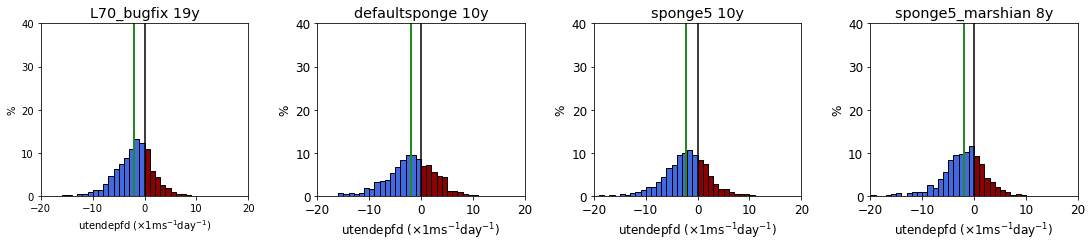

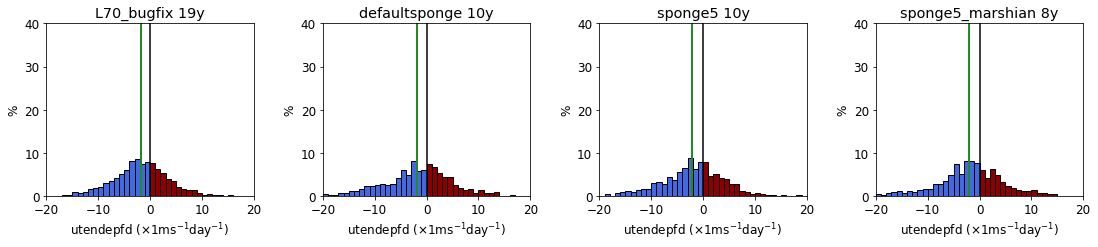

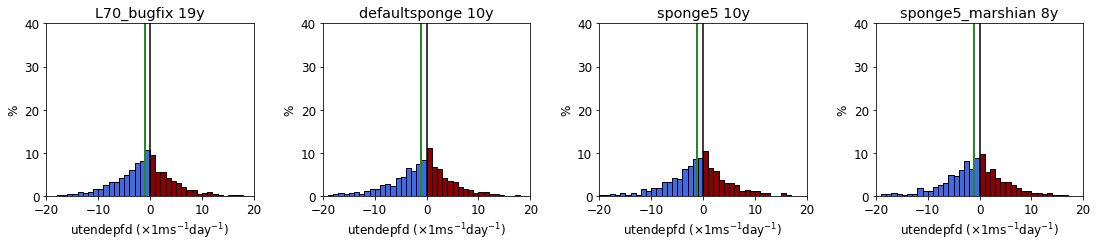

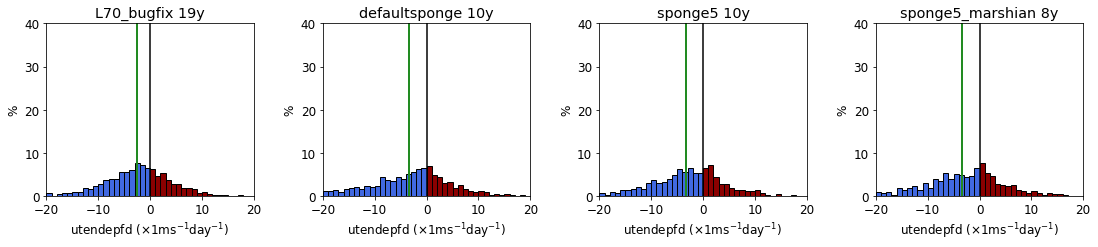

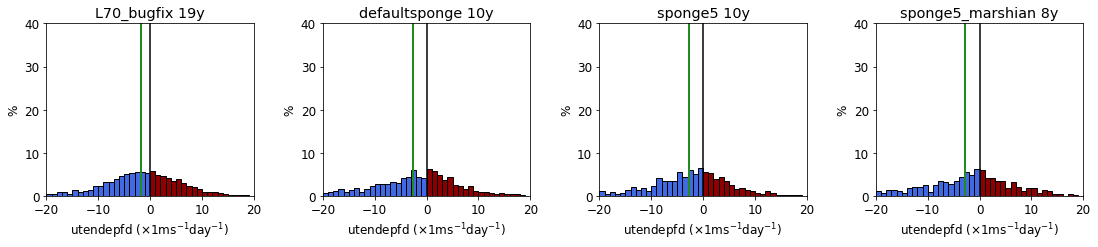

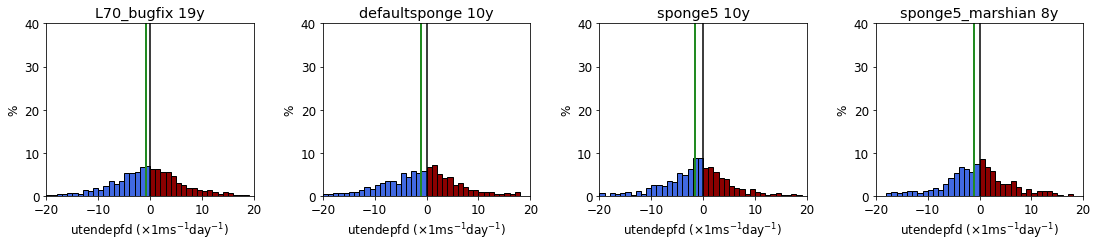

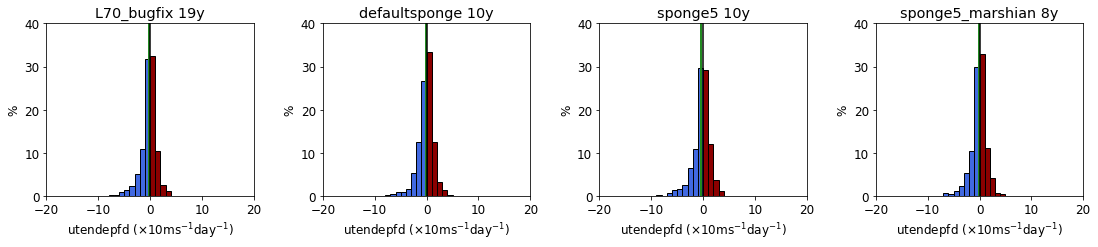

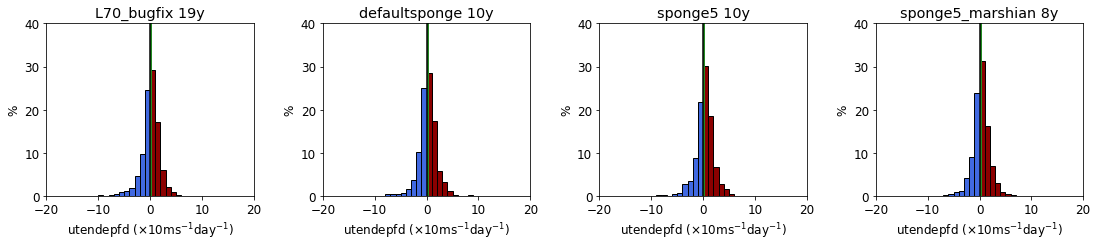

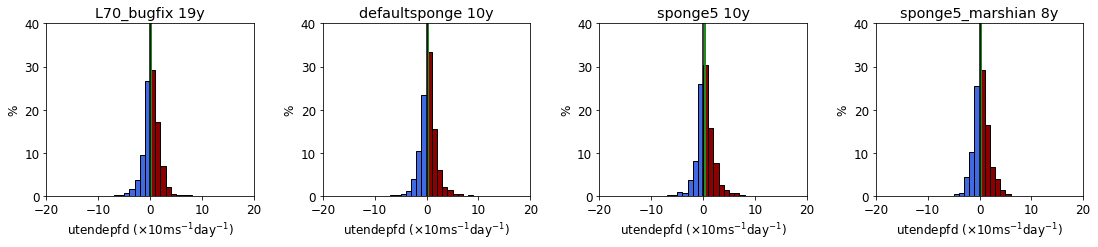

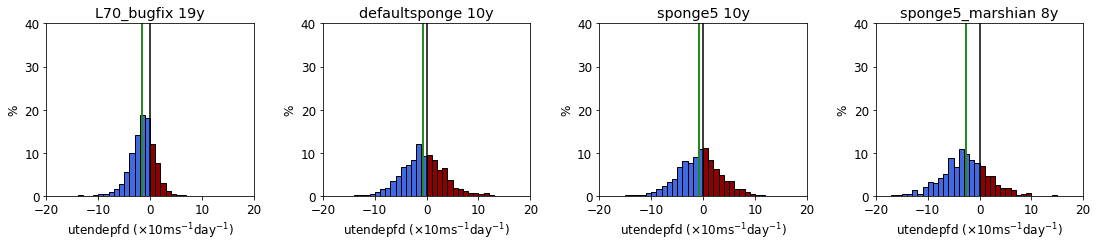

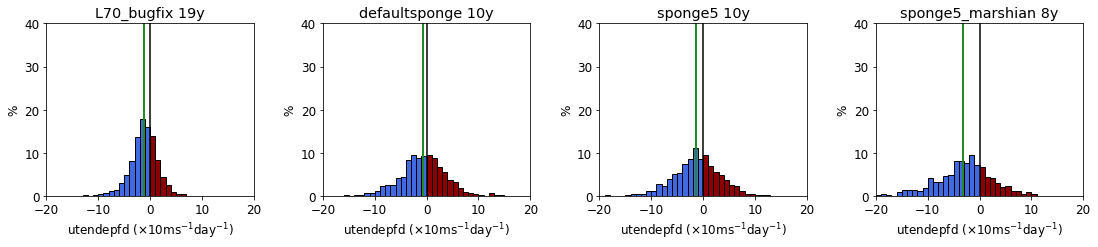

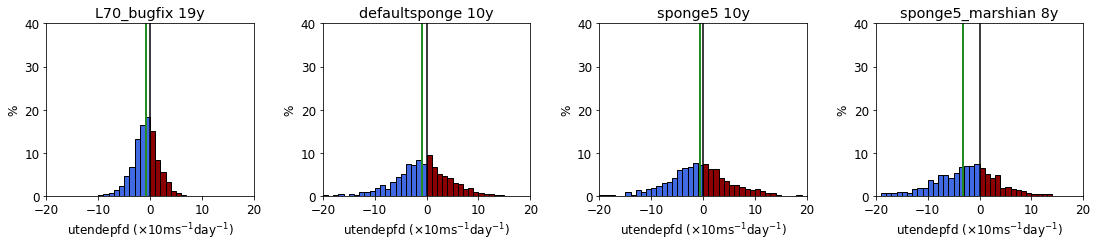

In [6]:
nplots = len(latplot)
for i in range(0,nplots,1):
    plt.figure(num=i,figsize=(16,16))
countplot=0

for iexp in expname:
    print(iexp)
    fpath=basepath+iexp+".nc"
    dat = xr.open_dataset(fpath, decode_times=True)
    djfdat = cal.group_season_daily(dat.utendepfd, "DJF")
    nyears = djfdat.year.size

    for i in range(0,nplots,1):
        datplot = djfdat.sel(lat=latplot[i], pre=preplot[i], method="nearest")
        datplot = np.array(datplot).flatten()
        fig = plt.figure(i)
        ax = dycoreplt.plotposneghisto(fig, 86400.*datplot/scale[i], -20,20,1,iexp+' '+str(nyears)+'y','utendepfd ($\\times$'+str(scale[i])+'ms$^{-1}$day$^{-1}$)', x1[countplot],x2[countplot],y1[countplot],y2[countplot], 
                               yrange=[0,40])
        plt.plot([86400.*datplot.mean()/scale[i],86400.*datplot.mean()/scale[i]],[0,40],linewidth=2, color='forestgreen')
        plt.plot([0,0],[0,40], color='black')
        #print("pre="+str(preplot[i])+' lat='+str(latplot[i])+' '+str(86400.*datplot.mean()))
        
    countplot=countplot+1
    
for i in range(0,nplots,1):
    fig = plt.figure(i)
    fig.savefig(plotpath+'utendepfdpdfs_'+str(preplot[i])+'hpa_'+str(latplot[i])+'N.pdf', facecolor='white', bbox_inches='tight')

In [7]:
latplot=[-60,-70,-80,-60,-70,-80,-60,-70,-80,-60,-70,-80]
preplot=[30,30,30,10,10,10,1,1,1,0.01,0.01,0.01]
scale=[1,1,1,1,1,1,10,10,10,10,10,10]

L70_bugfix
nyears=20.0
defaultsponge
nyears=11.0
sponge5
nyears=11.0
sponge5_marshian
nyears=9.0


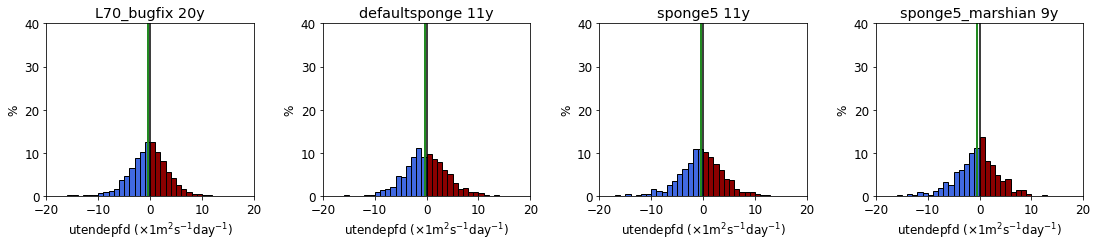

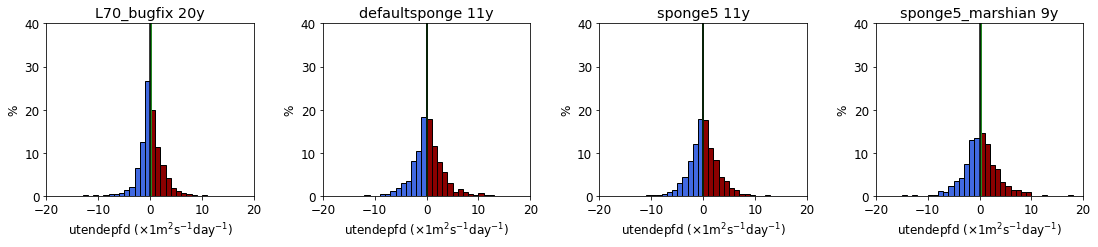

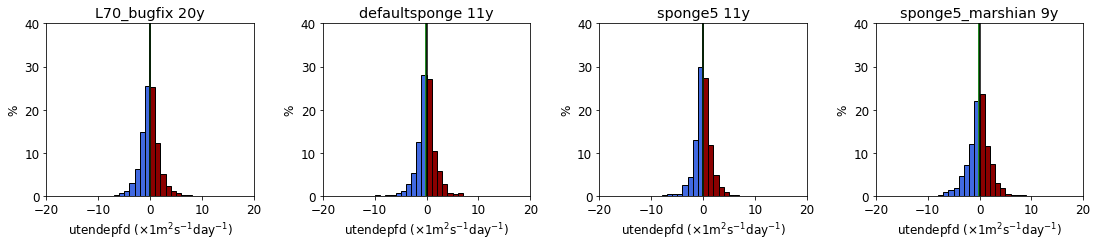

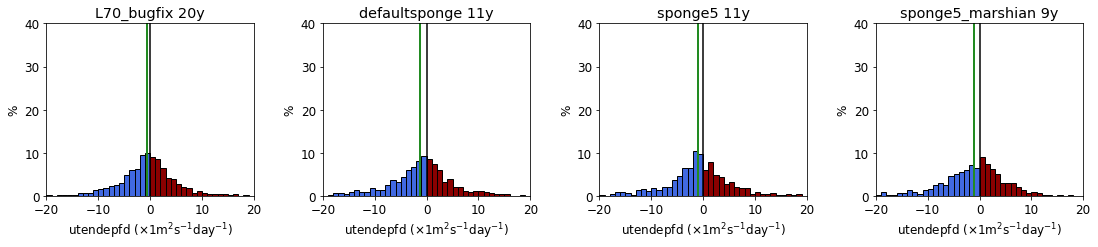

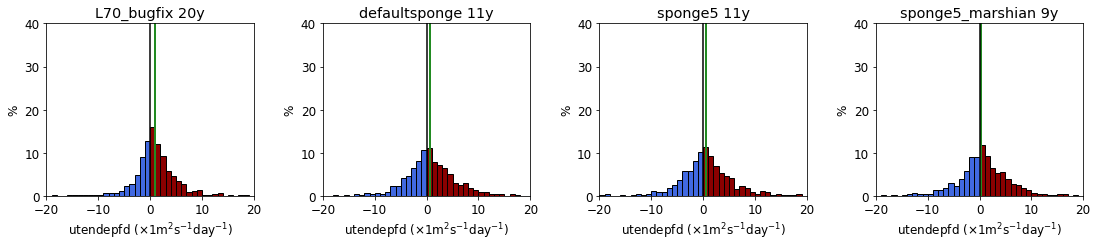

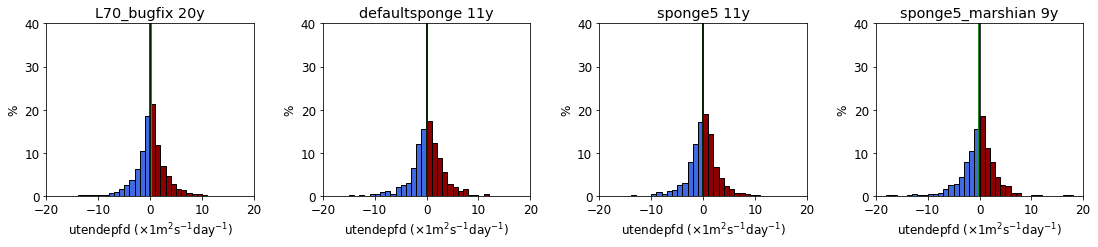

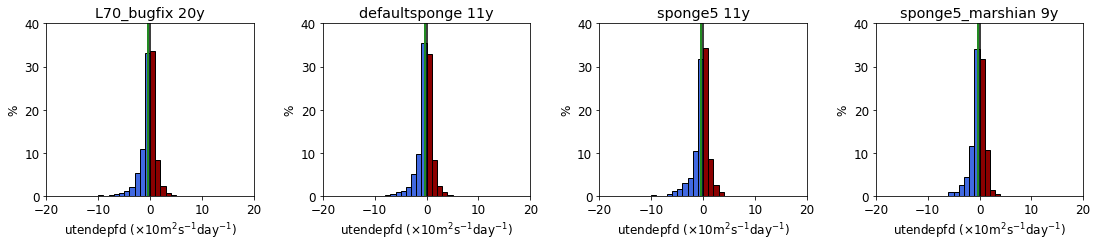

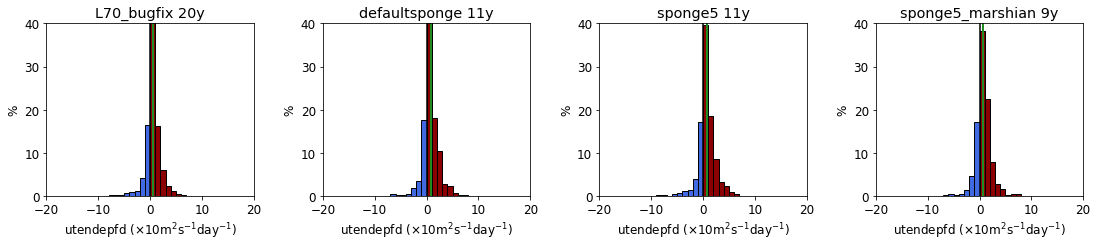

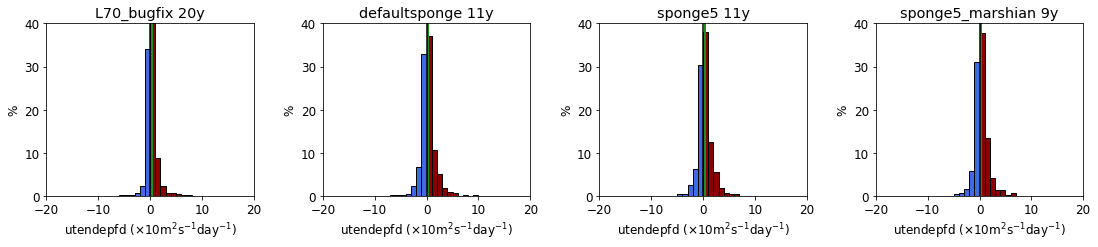

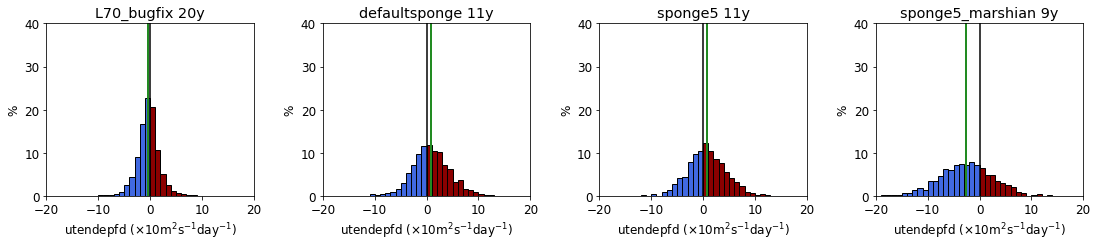

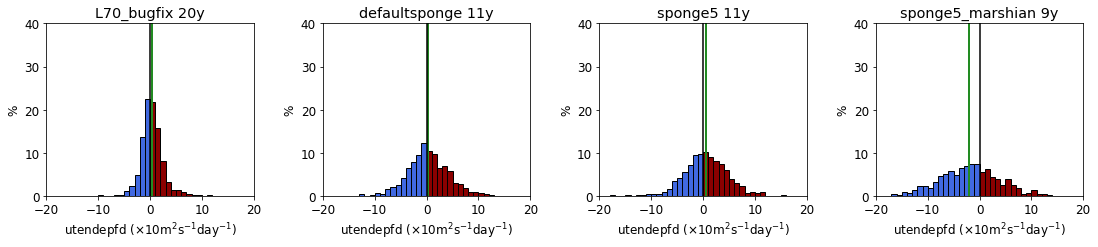

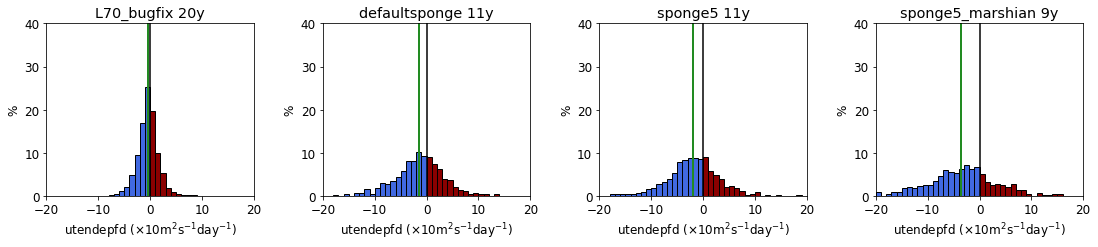

In [8]:
nplots = len(latplot)
for i in range(0,nplots,1):
    plt.figure(num=i,figsize=(16,16))
countplot=0

for iexp in expname:
    print(iexp)
    fpath=basepath+iexp+".nc"
    dat = xr.open_dataset(fpath, decode_times=True)
    jjadat = cal.group_season_daily(dat.utendepfd, "JJA")
    nyears = jjadat.year.size

    for i in range(0,nplots,1):
        datplot = jjadat.sel(lat=latplot[i], pre=preplot[i], method="nearest")
        datplot = np.array(datplot).flatten()
        fig = plt.figure(i)

        ax = dycoreplt.plotposneghisto(fig, 86400.*datplot/scale[i], -20,20,1,iexp+' '+str(nyears)+'y','utendepfd ($\\times$'+str(scale[i])+'m$^{2}$s$^{-1}$day$^{-1}$)', x1[countplot],x2[countplot],y1[countplot],y2[countplot], 
                               yrange=[0,40])
        plt.plot([86400.*datplot.mean()/scale[i],86400.*datplot.mean()/scale[i]],[0,40],linewidth=2, color='forestgreen')
        plt.plot([0,0],[0,40], color='black')
        
        
    countplot=countplot+1
    
for i in range(0,nplots,1):
    fig = plt.figure(i)
    fig.savefig(plotpath+'utendepfdpdfs_'+str(preplot[i])+'hpa_'+str(np.abs(latplot[i]))+'S.pdf', facecolor='white', bbox_inches='tight')